<a href="https://colab.research.google.com/github/pringleshu/2025-1_CV/blob/main/CV_homework_Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow    # colab에서 cv.imshow 사용

In [ ]:
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/school.jpg"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/finger.jpg"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0905(a)(wirebond-mask).tif"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0939(a)(headCT-Vandy).tif"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0938(a)(cygnusloop_Xray_original).tif"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0940(a)(rice_image_with_intensity_gradient).tif"
!wget "https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0943(a)(dark_blobs_on_light_background).tif"

--2025-04-13 06:37:57--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0309(a)(washed_out_aerial_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 589115 (575K) [image/tiff]
Saving to: ‘Fig0309(a)(washed_out_aerial_image).tif.2’

Fig0309(a)(washed_o 100%[===================>] 575.31K  --.-KB/s    in 0.05s   

2025-04-13 06:37:57 (10.7 MB/s) - ‘Fig0309(a)(washed_out_aerial_image).tif.2’ saved [589115/589115]

--2025-04-13 06:37:57--  https://raw.githubusercontent.com/kjcheoi-class/CV/main/Fig0310(b)(washed_out_pollen_image).tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443...

In [ ]:
img1 = cv2.imread('/content/Fig0309(a)(washed_out_aerial_image).tif')
img1 = cv2.resize(img1, dsize=(0,0), fx = 0.25, fy = 0.25)

In [ ]:
def gamma(f, gamma):#문제 조건 c = 1이기 때문에 생략가능
  f1 = f/255.0 #정규화
  return np.uint8(255*(f1**gamma)) #정규화 된 값에 gamma연산 후 다시 스케일링

In [ ]:
gc = np.hstack((gamma(img1, 1.0), gamma(img1, 3.0), gamma(img1, 4.0), gamma(img1,5.0)))

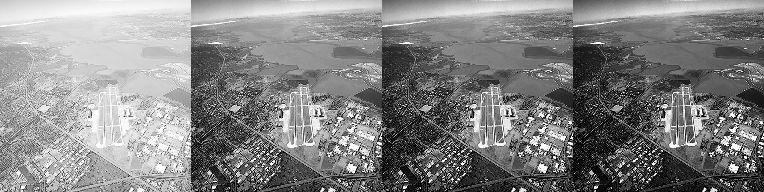

In [ ]:
cv2_imshow(gc)

# **HW#2-1 분석**

원본이미지는 밝고 대비가 낮음.

감마 연산에 의해 감마값이 커질수록 이미지가 어두워짐.

밝았던 영역은 정보가 손실될 수 있으며

어두운 영역의 대비가 강조됨.

In [ ]:
img2 = cv2.imread('/content/Fig0310(b)(washed_out_pollen_image).tif')
img2 = cv2.resize(img2, dsize=(0,0), fx = 0.25, fy = 0.25)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) #흑백으로 변환

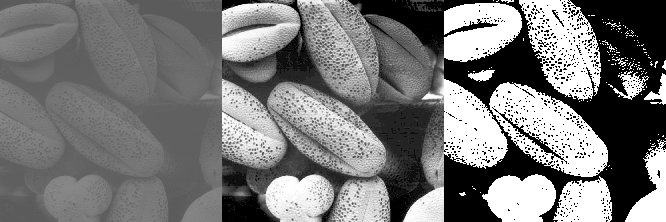

In [ ]:
stretched_img = cv2.equalizeHist(img2_gray) #히스토그램 평활화
t, bin_img = cv2.threshold(stretched_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #otsu알고리즘으로 최적의 임계값을 찾아 이진화

show2 = np.hstack((img2_gray, stretched_img, bin_img))
cv2_imshow(show2)

# **HW#2-2 분석**
원본 이미지는 명암 대비가 낮음.

히스토그램 평활화로 픽셀 값들을 넓게 퍼지게 하여 이미지를 개선

OTSU알고리즘으로 최적의 임계값을 찾아 배경과 객체를 명확하게 분리

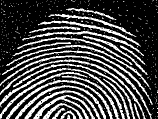

In [ ]:
img3 = cv2.imread('/content/finger.jpg')
img3 = cv2.resize(img3, dsize=(0,0), fx = 0.5, fy = 0.5)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY) #흑백으로 변환
img3_gray = np.int16(img3_gray) #필터 연산 중 음수가 나올 수 있으므로 16비트 정수변환(예제 참조)
cv2_imshow(img3_gray)

In [ ]:
box_filter = np.array([[1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9],
                       [1/9, 1/9, 1/9]], dtype=np.float32)

gauss_filter = np.array([
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
    [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
    [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]
], dtype=np.float32)

sharpening_filter = np.array([
    [ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]
], dtype=np.float32)

laplacian_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

emboss_filter =np.array([[-1.0, 0.0, 0.0],
                  [ 0.0, 0.0, 0.0],
                  [ 0.0, 0.0, 1.0]])

idk_filter = np.array([
    [-1,  -1,  0],
    [-1,  0,  1],
    [ 0,  1,  1]
], dtype=np.float32) #각각 필터 작성

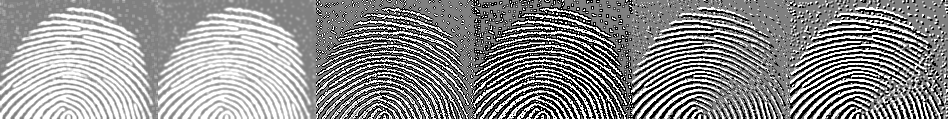

In [ ]:
box_img = np.uint8(np.clip(cv2.filter2D(img3_gray, -1, box_filter) + 128, 0, 255)) #예제를 참조하여 클리핑 후 uint8타입으로 변환
gauss_img = np.uint8(np.clip(cv2.filter2D(img3_gray, -1, gauss_filter) + 128, 0, 255)) #+128 중심이동
sharpening_img = np.uint8(np.clip(cv2.filter2D(img3_gray, -1, sharpening_filter) + 128, 0, 255))
laplacian_img = np.uint8(np.clip(cv2.filter2D(img3_gray, -1, laplacian_filter) + 128, 0, 255))
emboss_img = np.uint8(np.clip(cv2.filter2D(img3_gray, -1, emboss_filter) + 128, 0, 255))
idk_img = np.uint8(np.clip(cv2.filter2D(img3_gray, -1, idk_filter) + 128, 0, 255))

show3 = np.hstack((box_img, gauss_img, sharpening_img, laplacian_img, emboss_img, idk_img))
cv2_imshow(show3)

# **HW#2-3 분석**
박스 필터 : 각 픽셀의 명암값을 주변 픽셀 명암 값의 평균으로 교체함.

가우시안 필터 : 평균(박스)필터보다 더 자연스럽게 이미지가 처리 됨. (부드러워짐)

샤프닝(4-이웃 라플라시안) : 에지나 세부 디테일이 검출됨

8-이웃 라플라시안 : 더 많은 방향의 에지를 고려하며, 중심 가중치가 커서 반응이 강함

엠보싱 필터 : 이미지에 깊이감이 생김. 픽셀의 차이를 강조함.

대각선 필터 : 대각선 방향의 에지가 검출됨.

In [ ]:
img4 = cv2.imread('/content/school.jpg')
img4 = cv2.resize(img4, dsize=(0,0), fx = 0.5, fy = 0.5)
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY) #흑백으로 변환


In [ ]:
mask45 = np.array([
    [-2, -1,  0],
    [-1,  0,  1],
    [ 0,  1,  2]
], dtype=np.float32) #수직 sobel마스크를 시계방향으로 한 칸 돌림

mask_45 = np.array([
    [ 0, -1, -2],
    [ 1,  0, -1],
    [ 2,  1,  0]
], dtype=np.float32) #수평 sobel마스크를 시계방향으로 한 칸 돌림


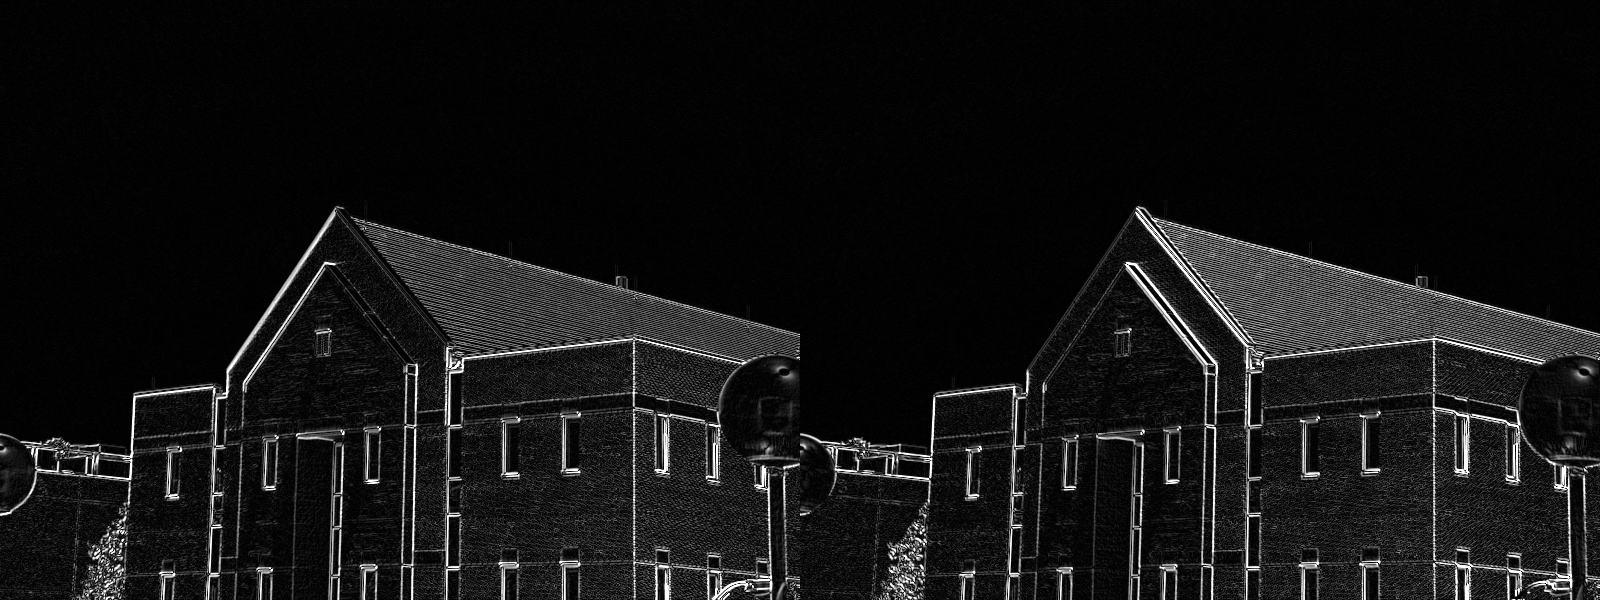

In [ ]:
edge45 = cv2.filter2D(img4_gray, cv2.CV_32F, mask45)
edgeN45 = cv2.filter2D(img4_gray, cv2.CV_32F, mask_45)
sobel_45 = cv2.convertScaleAbs(edge45) #양수로 변환
sobel_N45 = cv2.convertScaleAbs(edgeN45) #양수로 변환
show4 = np.hstack((sobel_45, sobel_N45))
cv2_imshow(show4)

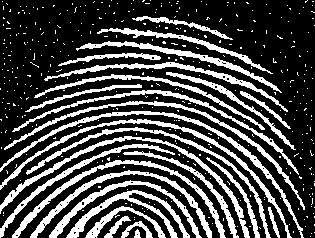

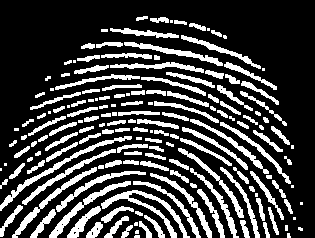

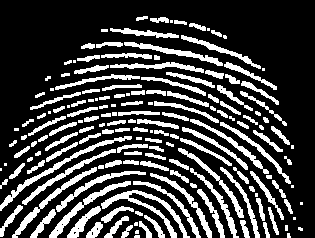

In [ ]:
img5 = cv2.imread('/content/finger.jpg', cv2.IMREAD_GRAYSCALE)
morph = np.ones((3,3), np.uint8)
cv2_imshow(img5)

opening_img5 = cv2.morphologyEx(img5, cv2.MORPH_OPEN, morph, iterations=1)
cv2_imshow(opening_img5) #opening 이후

closing_img = cv2.morphologyEx(opening_img5, cv2.MORPH_OPEN, morph, iterations=1)
cv2_imshow(closing_img) #closing 이후

# **HW#2-5 분석**
Opening연산을 진행하니 작은 객체들이 제거된 것을 볼 수 있음

이후 closing으로 지문 내부에 작은 틈이 매꾸어짐.

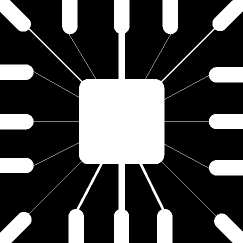

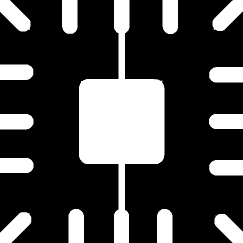

In [ ]:
img6 = cv2.imread('/content/Fig0905(a)(wirebond-mask).tif', cv2.IMREAD_GRAYSCALE)
img6 = cv2.resize(img6, dsize=(0,0), fx = 0.5, fy = 0.5)
cv2_imshow(img6)
size = 5
morph6 = np.ones((size, size), np.uint8)
opening6_img = cv2.morphologyEx(img6, cv2.MORPH_OPEN, morph6, iterations=1)
cv2_imshow(opening6_img)

# **HW#2-6 분석**

이미지의 가는 선분들을 제거하기 위해 모폴로지 Opening연산(침식 후 팽창)을 적용
형태소가 너무 크면 큰 객체까지 없어질 수 있음

opening연산을 통해 얇은 선이 없어진것을 확인할 수 있음.

In [ ]:
img7 = cv2.imread('/content/Fig0939(a)(headCT-Vandy).tif', cv2.IMREAD_GRAYSCALE)

In [ ]:
grad_x = cv2.Sobel(img7, cv2.CV_32F, 1, 0, ksize=3) #Sobel edge검출
grad_y = cv2.Sobel(img7, cv2.CV_32F, 0, 1, ksize=3)

sobel_x = cv2.convertScaleAbs(grad_x)
sobel_y = cv2.convertScaleAbs(grad_y)

edge_strength = cv2.addWeighted(sobel_x,0.5, sobel_y,0.5, 0) #pdf 71page 참조

In [ ]:
laplacian7 = cv2.Laplacian(img7, cv2.CV_32F, ksize=3) #laplacian edge검출
laplacian7 = cv2.convertScaleAbs(laplacian7)

In [ ]:
canny7 = cv2.Canny(img7, 50, 150) #canny edge검출

In [ ]:
morph7 = np.ones((3,3), np.uint8)
morph_grad7 = cv2.morphologyEx(img7, cv2.MORPH_GRADIENT, morph7)

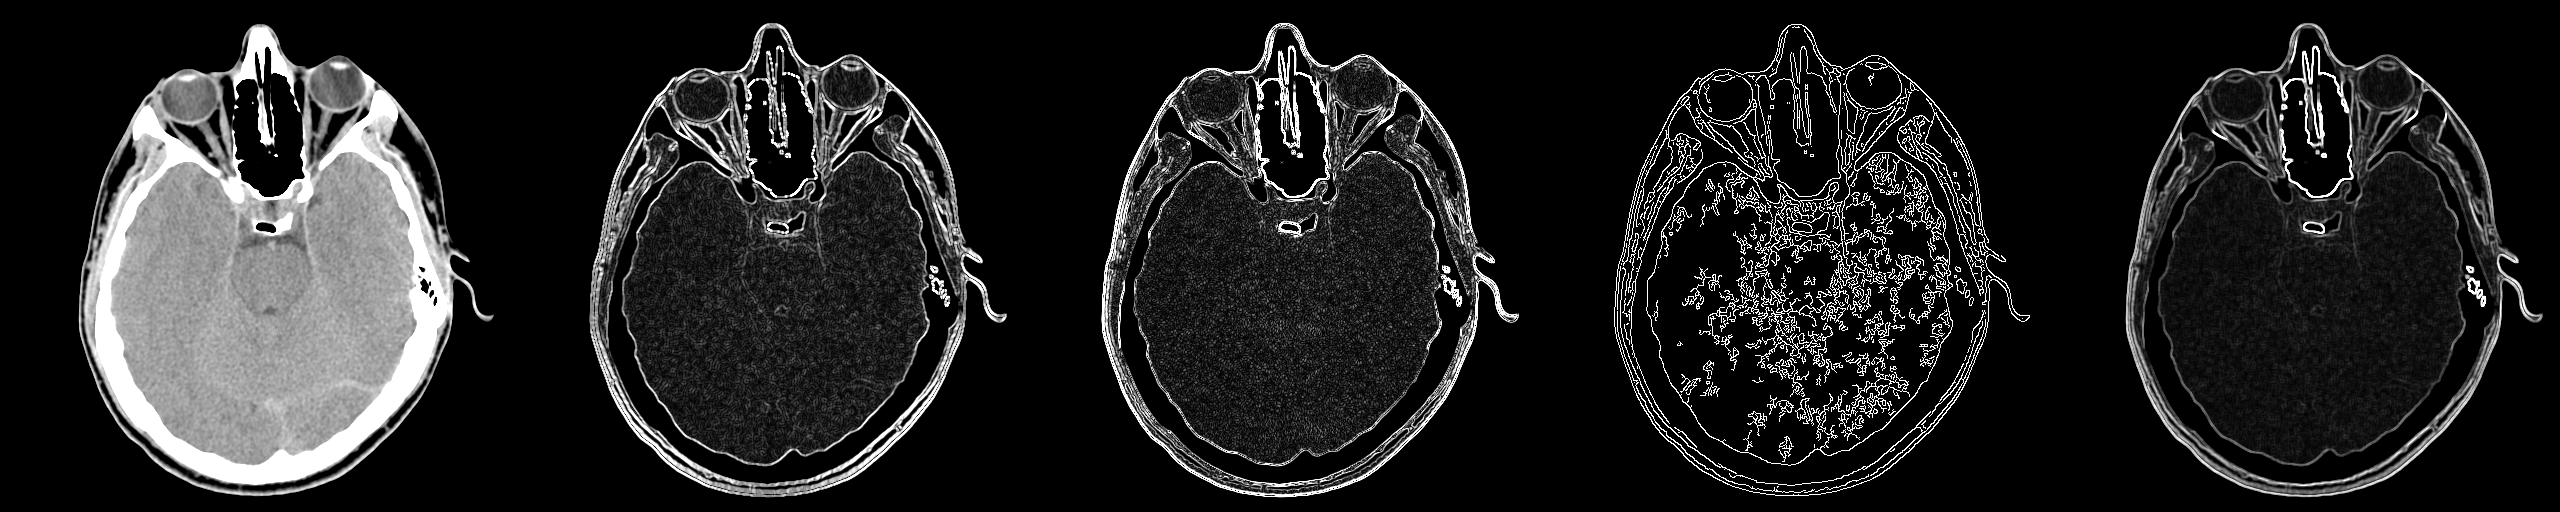

In [ ]:
show7 = np.hstack((img7, edge_strength, laplacian7, canny7, morph_grad7))
cv2_imshow(show7)

# **HW#2-7 분석**
sobel edge 검출 : 비교적 두꺼운 에지를 보여주며, 기울기 강도에 따라 밝기가 달라지는 것을 볼 수 있음.

laplacia edge 검출 :매우 가는 선 형태의 에지를 나타내며, 이중 에지도 보임.

canny edge 검출 : 에지가 모두 같은 두께(한 픽셀)로 만들어진 것을 볼 수 있음.

morph edge 검출 : 설정한 형태소에 따라 검출되는 에지의 모양이 달라지는 것을 확인함.

In [ ]:
img8 = cv2.imread('/content/Fig0938(a)(cygnusloop_Xray_original).tif', cv2.IMREAD_GRAYSCALE)

In [ ]:
morph8 = np.ones((7, 7), np.uint8)
opening_img8 = cv2.morphologyEx(img8, cv2.MORPH_OPEN, morph8,iterations=1)
closing_img8 = cv2.morphologyEx(opening_img8, cv2.MORPH_CLOSE, morph8,iterations=1)

In [ ]:
mean_smoothin = cv2.medianBlur(img8, 7)

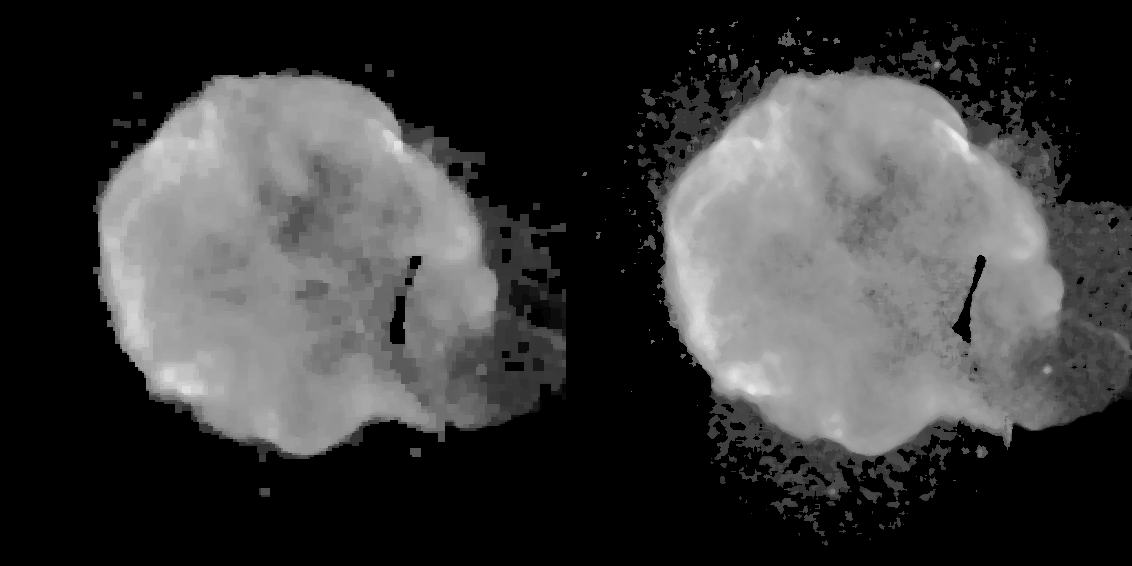

In [ ]:
show8 = np.hstack((closing_img8, mean_smoothin))
cv2_imshow(show8)

# **HW#2-8 분석**
형태학적 스무딩(morphological smothing)연산 :열림 연산과 닫힘 연산을 결합하여 영상 스무딩과 노이즈 제거용 형태학 필터로 사용

열림연산으로 지정된 형태소(위 코드에선 7*7)보다 작은 밝은 디테일을 억압 후 닫힘연산으로 어두운 디테일을 억압함.

스무딩 필터(smothing filter) : 픽셀의 중간값으로 이미지를 향상 시킴

In [ ]:
img9 = cv2.imread('/content/Fig0940(a)(rice_image_with_intensity_gradient).tif', cv2.IMREAD_GRAYSCALE)

In [ ]:
otsu_th9, otsu_img9 = cv2.threshold(img9, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
top_hat = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
opening_img9 = cv2.morphologyEx(img9, cv2.MORPH_OPEN, top_hat)
tophat_img9 = cv2.subtract(img9, opening_img9) # 원본 이미지 - 오프닝 이미지
otsu_th9_1, otsu_img9_1 = cv2.threshold(tophat_img9, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

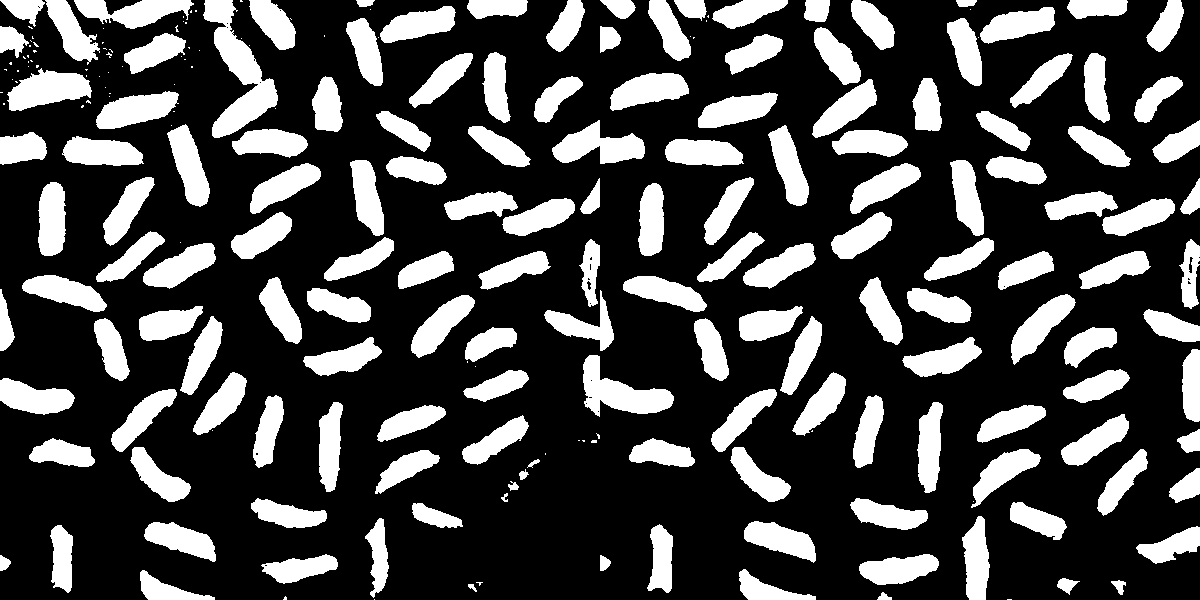

In [ ]:
show9 = np.hstack((otsu_img9, otsu_img9_1))
cv2_imshow(show9)

# **HW#2-9 분석**
 otsu : 이미지 전체에 대해 단일 임계값을 사용하므로, 배경의 명암 변화(gradient) 때문에 문제가 발생함.

 쌀알을 정확하게 분리하지 못하고 배경의 영향을 많이 받음

 top-hat 후 otsu : 배경이 거의 검은색으로 균일해지고 쌀알(밝은 객체)만 두드러지게 나타남



In [ ]:
img10 = cv2.imread('/content/Fig0943(a)(dark_blobs_on_light_background).tif', cv2.IMREAD_GRAYSCALE)

In [ ]:
ksize = 60
kernel_30 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize)) #30크기 형태소
closing_img10 = cv2.morphologyEx(img10, cv2.MORPH_CLOSE, kernel_30)

ksize = 120
kernel_60 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (ksize, ksize)) #크기 60 형태소
opening_img10 = cv2.morphologyEx(closing_img10, cv2.MORPH_OPEN, kernel_60)

ksize = 5
kernel_grad = np.ones((ksize, ksize), np.uint8)
boundary_img10 = cv2.morphologyEx(opening_img10, cv2.MORPH_GRADIENT, kernel_grad)#경계선을 추출

color_img10 = cv2.cvtColor(img10, cv2.COLOR_GRAY2BGR)
color_img10[boundary_img10 != 0] = [255, 255, 255] # 경계선을 흰색으로 표시, 3채널로 변환됨

closing_img10 = cv2.cvtColor(closing_img10, cv2.COLOR_GRAY2BGR) #hstack을 위해 컬러로 변환
opening_img10 = cv2.cvtColor(opening_img10, cv2.COLOR_GRAY2BGR)


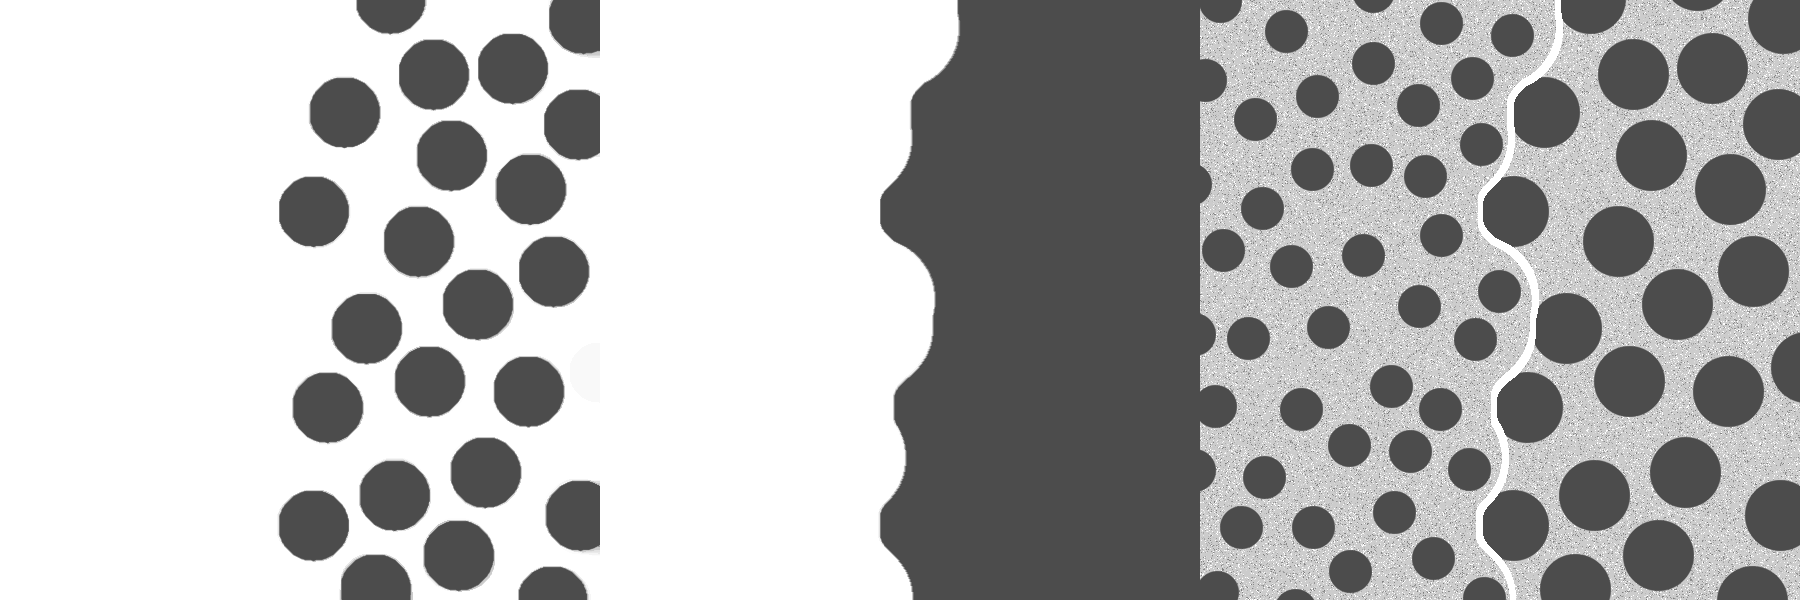

In [ ]:
show10 = np.hstack((closing_img10, opening_img10, color_img10))
cv2_imshow(show10) # Colab에서 이미지 표시

# **HW#2-10 분석**

형태소는 얼룩보다 큰 구조 요소(60*60, 30으로 했으나 잘 되지 않음)를 사용함

닫힘 연산으로 작은 얼룩들을 제거

이후 형태소(120*120)을 사용하여 큰 얼룩들을 연결함

열림 연산 결과 이미지에 형태학적 기울기 연산(팽창 - 침식)을 적용하여 분할된 영역의 경계선을 추출함.

추출된 경계선을 원본 이미지 위에 흰색으로 표시하여 최종 분할 결과를 시각화함.